# Coursera Course Dataset

The dataset is prepared by SIDDHARTH M.

Here is the link : https://www.kaggle.com/siddharthm1698/coursera-course-dataset


This dataset contains mainly 6 columns and 890 course data. The detailed description:

1. course_title : Contains the course title.
2. course_organization : It tells which organization is conducting the courses.
3. courseCertificatetype : It has details about what are the different certifications available in courses.
4. course_rating : It has the ratings associated with each course.
5. course_difficulty : It tells about how difficult or what is the level of the course.
6. coursestudentsenrolled : It has the number of students that are enrolled in the course.

1 - Import libraries I used for visualization

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
from collections import Counter
from operator import itemgetter
from IPython.display import display, HTML
from plotly.subplots import make_subplots
from wordcloud import WordCloud, STOPWORDS,ImageColorGenerator 
from PIL import Image, ImageOps
import plotly.express as px
import plotly.io as pio
%matplotlib inline

2 - Define dataframe after loading all values from cv file and assigning them to it

In [2]:
file_location_url = "files/coursea_data.csv";

coursera_df = pd.read_csv(file_location_url, error_bad_lines=False,encoding = "utf-8")

In [3]:
row_count = coursera_df.shape[0]
column_count = coursera_df.shape[1]

print("Row : {} , Column : {}".format(row_count,column_count))

Row : 891 , Column : 7


3 - Show first 5 values of dataframe

In [4]:
coursera_df.head()

,Unnamed: 0,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
0,134,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5.3k
1,743,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17k
2,874,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130k
3,413,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91k
4,635,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320k


4 - Show last 5 values of dataframe

In [5]:
coursera_df.tail()

,Unnamed: 0,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
886,236,Программирование на Python,Mail.Ru Group,SPECIALIZATION,4.5,Intermediate,52k
887,883,Психолингвистика (Psycholinguistics),Saint Petersburg State University,COURSE,4.8,Mixed,21k
888,545,Разработка интерфейсов: вёрстка и JavaScript,E-Learning Development Fund,SPECIALIZATION,4.5,Intermediate,30k
889,875,Русский как иностранный,Saint Petersburg State University,SPECIALIZATION,4.6,Intermediate,9.8k
890,163,Финансовые инструменты для частного инвестора,National Research University Higher School of ...,SPECIALIZATION,4.7,Beginner,38k


5 - Show each column information of dataframe

In [6]:
coursera_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                891 non-null    int64  
 1   course_title              891 non-null    object 
 2   course_organization       891 non-null    object 
 3   course_Certificate_type   891 non-null    object 
 4   course_rating             891 non-null    float64
 5   course_difficulty         891 non-null    object 
 6   course_students_enrolled  891 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 48.9+ KB


6 - Show how many variables there are in dataframe

In [7]:
coursera_df.count()

Unnamed: 0                  891
course_title                891
course_organization         891
course_Certificate_type     891
course_rating               891
course_difficulty           891
course_students_enrolled    891
dtype: int64

7 - Show descriptive statistics of dataframe

In [8]:
coursera_df.describe()

,Unnamed: 0,course_rating
count,891.000000,891.000000
mean,445.000000,4.677329
std,257.353842,0.162225
min,0.000000,3.300000
25%,222.500000,4.600000
50%,445.000000,4.700000
75%,667.500000,4.800000
max,890.000000,5.000000


8 - Determine if null values of each column are in a dataframe

In [9]:
coursera_df.isnull().sum()

Unnamed: 0                  0
course_title                0
course_organization         0
course_Certificate_type     0
course_rating               0
course_difficulty           0
course_students_enrolled    0
dtype: int64

9 - Check unique values for each column

In [10]:
coursera_df['course_title'].unique()

array(['(ISC)² Systems Security Certified Practitioner (SSCP)',
       'A Crash Course in Causality:  Inferring Causal Effects from Observational Data',
       'A Crash Course in Data Science', "A Law Student's Toolkit",
       'A Life of Happiness and Fulfillment',
       'ADHD: Everyday Strategies for Elementary Students',
       'AI For Everyone', 'AI For Medical Treatment',
       'AI Foundations for Everyone', 'AI for Medical Diagnosis',
       'AI for Medical Prognosis', 'AI for Medicine', 'AWS Fundamentals',
       'AWS Fundamentals: Addressing Security Risk',
       'AWS Fundamentals: Building Serverless Applications',
       'AWS Fundamentals: Going Cloud-Native',
       'AWS Fundamentals: Migrating to the Cloud',
       'Aboriginal Worldviews and Education', 'Academic English: Writing',
       'Accelerated Computer Science Fundamentals', 'Access Controls',
       'Accounting Analytics', 'Accounting for Decision Making',
       'Achieving Personal and Professional Success',
  

In [11]:
coursera_df['course_organization'].unique()

array(['(ISC)²', 'University of Pennsylvania', 'Johns Hopkins University',
       'Yale University', 'Indian School of Business',
       'University at Buffalo', 'deeplearning.ai', 'IBM',
       'Amazon Web Services', 'University of Toronto',
       'University of California, Irvine',
       'University of Illinois at Urbana-Champaign',
       'University of Michigan',
       'Universidad Nacional Autónoma de México',
       'University of Colorado Boulder',
       'National Research University Higher School of Economics',
       'Google Cloud', 'Erasmus University Rotterdam', 'Duke University',
       'University of Virginia', 'Atlassian', 'ScrumTrek',
       'University of California San Diego', 'Stanford University',
       'University of Colorado System', 'Copenhagen Business School',
       'Macquarie University', 'Vanderbilt University',
       'The University of Edinburgh',
       'Technical University of Denmark (DTU)', 'Universidad Austral',
       'Arizona State University', 

In [12]:
coursera_df['course_Certificate_type'].unique()

array(['SPECIALIZATION', 'COURSE', 'PROFESSIONAL CERTIFICATE'],
      dtype=object)

In [13]:
coursera_df['course_rating'].unique()

array([4.7, 4.5, 4.8, 4.6, 4.3, 4.4, 4.9, 4.2, 5. , 3.3, 4.1, 4. , 3.7,
       3.9])

In [14]:
coursera_df['course_difficulty'].unique()

array(['Beginner', 'Intermediate', 'Mixed', 'Advanced'], dtype=object)

In [15]:
coursera_df['course_students_enrolled'].unique()

array(['5.3k', '17k', '130k', '91k', '320k', '39k', '350k', '2.4k', '61k',
       '12k', '4k', '13k', '11k', '27k', '110k', '6.6k', '540k', '22k',
       '2.9k', '80k', '9.9k', '23k', '9.2k', '78k', '190k', '35k', '29k',
       '14k', '21k', '94k', '69k', '40k', '220k', '150k', '18k', '270k',
       '7.9k', '30k', '36k', '20k', '8.1k', '120k', '71k', '63k', '42k',
       '480k', '97k', '200k', '180k', '4.2k', '310k', '3.9k', '79k',
       '31k', '15k', '10k', '66k', '33k', '56k', '7.3k', '9.7k', '210k',
       '28k', '6.5k', '55k', '2.3k', '8.8k', '88k', '1.9k', '68k', '1.6k',
       '9.5k', '57k', '26k', '84k', '95k', '5.8k', '24k', '67k', '280k',
       '38k', '77k', '510k', '89k', '48k', '160k', '32k', '340k', '82k',
       '790k', '19k', '51k', '4.8k', '37k', '43k', '6.4k', '49k', '240k',
       '46k', '7.8k', '75k', '81k', '140k', '5.5k', '99k', '100k', '3k',
       '830k', '740k', '60k', '96k', '690k', '44k', '4.5k', '8.2k', '16k',
       '300k', '8k', '41k', '54k', '9k', '380k',

10 - Rename the name of some columns in dataframe

In [16]:
coursera_df=coursera_df.rename(columns={'Unnamed: 0':'Cid'})

11 - Change values of course_students_enrolled column

In [17]:
#m = coursera_df['course_students_enrolled'].str.endswith('m')
#k = coursera_df['course_students_enrolled'].str.endswith('k')

#coursera_df.loc[m, 'course_students_enrolled'] = pd.to_numeric(coursera_df.loc[m, 'course_students_enrolled'].str.replace('m', ''))*1000
#coursera_df.loc[k, 'course_students_enrolled'] = pd.to_numeric(coursera_df.loc[k, 'course_students_enrolled'].str.replace('m', ''))*100

In [18]:
def jr_replace(x):
    if x.endswith('m'):
        x = pd.to_numeric(x.replace('m',''))*1000000
    elif x.endswith('k'):
        x = pd.to_numeric(x.replace('k',''))*1000
    return x

In [19]:
coursera_df['course_students_enrolled'] = coursera_df['course_students_enrolled'].apply(jr_replace)

In [20]:
coursera_df['course_students_enrolled'] = coursera_df['course_students_enrolled'].astype(int)

In [21]:
coursera_df.head()

,Cid,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
0,134,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5300
1,743,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17000
2,874,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130000
3,413,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91000
4,635,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320000


12 - Draw a Figure to show the number of course level in bar graph

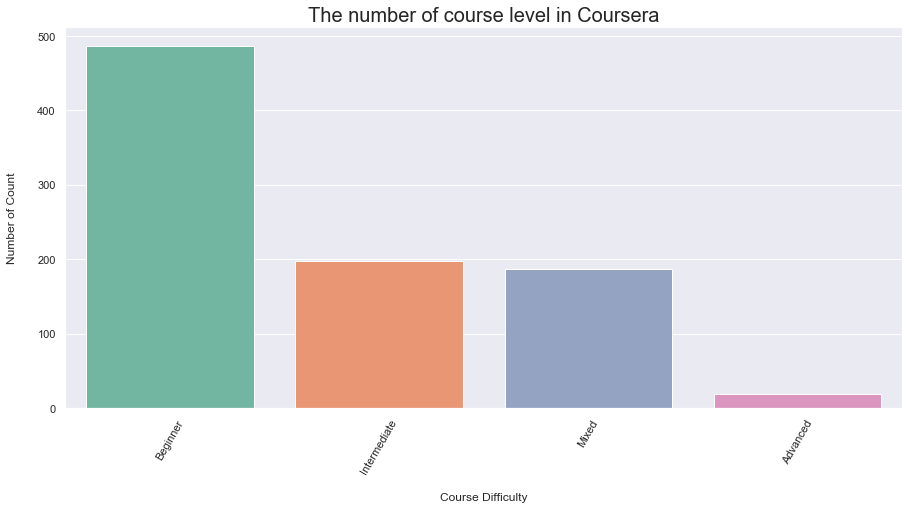

In [22]:
plt.figure(figsize=(15, 7))
sns.set(style="darkgrid")
ax = sns.countplot(x="course_difficulty", 
                   data=coursera_df, 
                   palette="Set2")
plt.title('The number of course level in Coursera', fontsize=20, y=1)
plt.xlabel('Course Difficulty', labelpad=16)
plt.ylabel('Number of Count', labelpad=20)
plt.xticks(rotation=60)
plt.savefig('images/image1.png')
plt.show()

13 - Draw a Figure to show the ratio number of Coursera Certificate type in pie graph

<Figure size 1080x504 with 0 Axes>

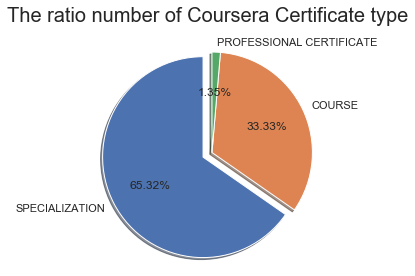

In [23]:
plt.figure(figsize=(15, 7))
fig1, ax1 = plt.subplots()
explode = (0.1, 0, 0) 
labels = coursera_df['course_Certificate_type'].unique()
ax1.pie(coursera_df['course_Certificate_type'].value_counts(), explode=explode, labels=labels, autopct='%.2f%%',
        shadow=True, startangle=90)

ax1.axis('equal')
plt.title('The ratio number of Coursera Certificate type', fontsize=20, y=1,pad=20)

plt.tight_layout()
fig1.savefig('images/image2.png')
plt.show();

14 - Draw A figure to show Coursera Courses categorized by its difficulty in count plot

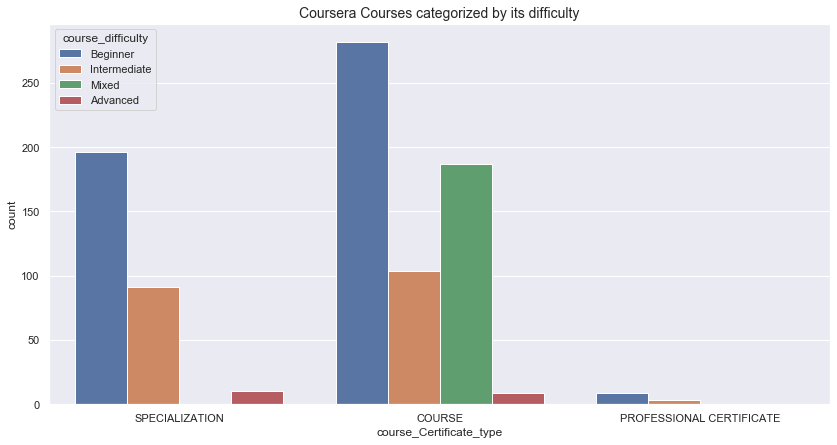

In [24]:
plt.figure(figsize = (14,7))
sns.countplot(data = coursera_df, x = coursera_df["course_Certificate_type"], hue = coursera_df["course_difficulty"])
plt.title("Coursera Courses categorized by its difficulty", fontsize = 14)
plt.savefig('images/image3.png')
plt.show()

15 - Draw pie graph to show the spectrum of course difficulty in terms of its certification type

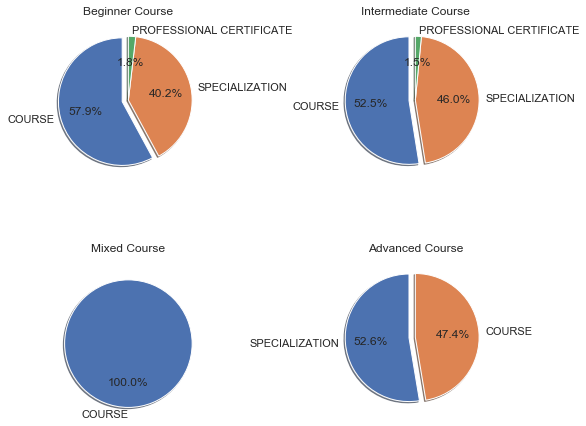

In [25]:
coursera_df_beginner = coursera_df[coursera_df["course_difficulty"] == "Beginner"]
coursera_df_intermediate = coursera_df[coursera_df["course_difficulty"] == "Intermediate"]
coursera_df_mixed = coursera_df[coursera_df["course_difficulty"] == "Mixed"]
coursera_df_advanced = coursera_df[coursera_df["course_difficulty"] == "Advanced"]


f,a = plt.subplots(2,2,figsize=(8,8))
f.subplots_adjust(wspace = .8)

coursera_df_beginner["course_Certificate_type"].value_counts().plot(kind='pie',
                                                                    shadow=True, 
                                                                    explode=(0.1, 0, 0), 
                                                                    startangle=90,
                                                                    autopct='%1.1f%%', ax=a[0,0])
a[0,0].set_title('Beginner Course')
a[0,0].set_ylabel('');


coursera_df_intermediate["course_Certificate_type"].value_counts().plot(kind='pie',
                                                                        shadow=True, 
                                                                        explode=(0.1, 0, 0), 
                                                                        startangle=90,
                                                                        autopct='%1.1f%%', ax=a[0,1])

a[0,1].set_title('Intermediate Course')
a[0,1].set_ylabel('');

coursera_df_mixed["course_Certificate_type"].value_counts().plot(kind='pie',
                                                                 shadow=True, 
                                                                 explode=(0.1,), 
                                                                 startangle=90,
                                                                 autopct='%1.1f%%', 
                                                                 ax=a[1,0])
a[1,0].set_title('Mixed Course')
a[1,0].set_ylabel('');

coursera_df_advanced["course_Certificate_type"].value_counts().plot(kind='pie',
                                                                    shadow=True,
                                                                    explode=(0.1, 0), 
                                                                    startangle=90,
                                                                    autopct='%1.1f%%', 
                                                                    ax=a[1,1])

a[1,1].set_title('Advanced Course')
a[1,1].set_ylabel('');

plt.savefig('images/image4.png')

16 - Draw a Figure to show the spectrum of course rating with its counts

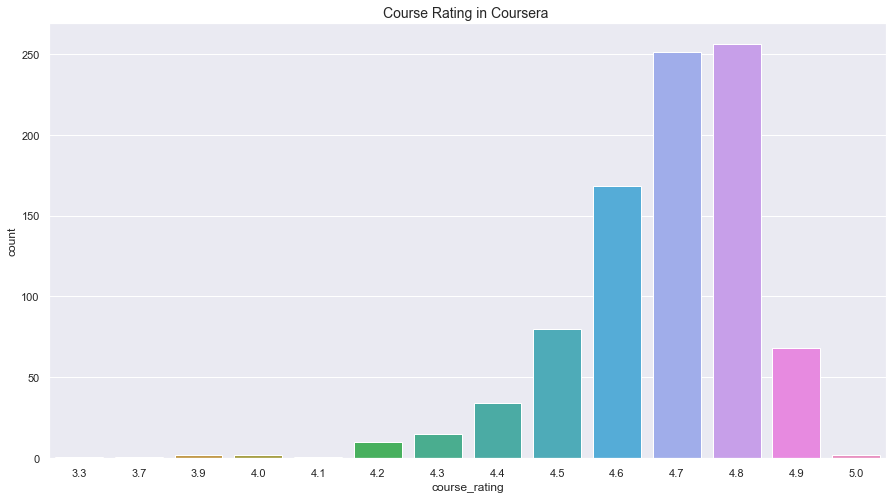

In [26]:
plt.figure(figsize=(15,8))
sns.countplot('course_rating',data=coursera_df)
plt.title("Course Rating in Coursera ", fontsize = 14)
plt.savefig('images/image5.png')
plt.show()

17 - Draw A Figure to show the distribution of course rating i Coursera

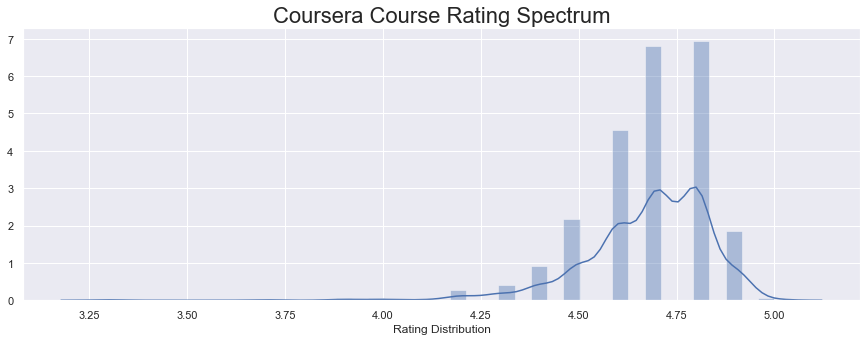

In [27]:
ax = sns.distplot(coursera_df['course_rating'])
ax.figure.set_size_inches(15,5)
ax.set_xlabel('Rating Distribution')
ax.set_title('Coursera Course Rating Spectrum', fontsize = 22)
plt.savefig('images/image6.png')
plt.show()

18 - Show top 10 course organization providing courses in Coursera

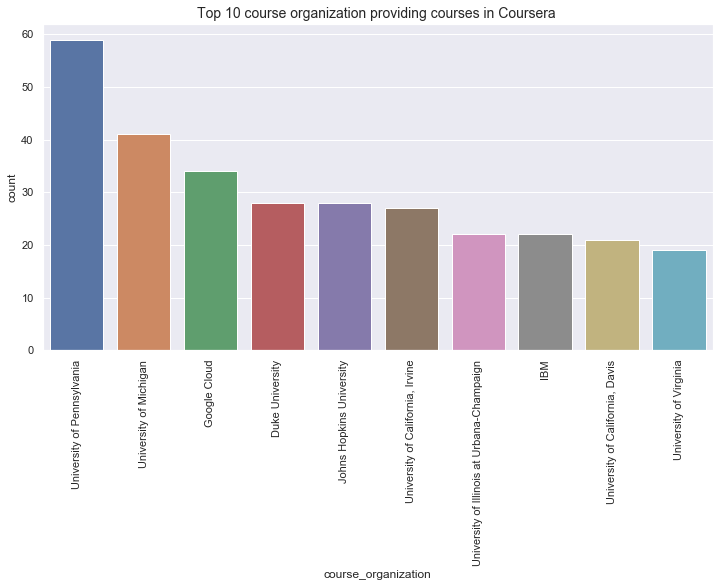

In [28]:
plt.figure(figsize=(12,6))
sns.countplot(data=coursera_df, 
              x = 'course_organization', 
              order=coursera_df['course_organization'].value_counts().iloc[:10].index)
plt.xticks(rotation=90)
plt.title("Top 10 course organization providing courses in Coursera ", fontsize = 14)
plt.savefig('images/image7.png')
plt.show()

19 - Show top 10 course organization providing courses in terms of their certificate type in Coursera

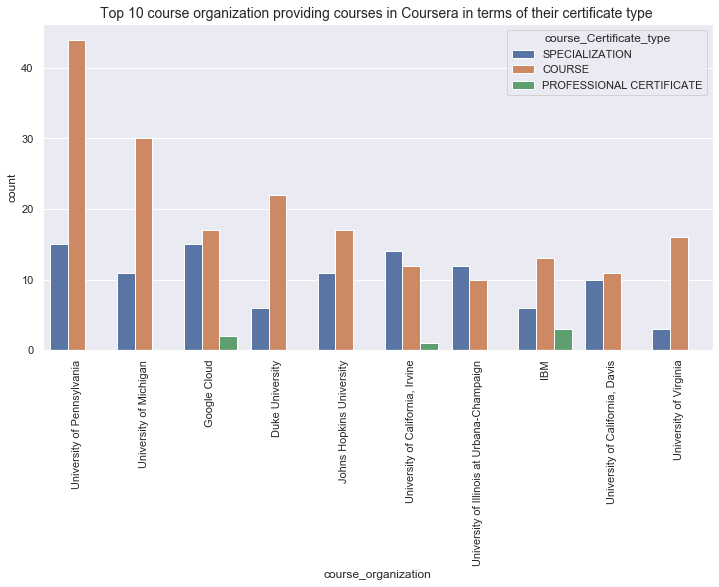

In [29]:
plt.figure(figsize=(12,6))
sns.countplot(data=coursera_df, 
              x = 'course_organization', 
              order=coursera_df['course_organization'].value_counts().iloc[:10].index,
              hue='course_Certificate_type'
             )
plt.xticks(rotation=90)
plt.title("Top 10 course organization providing courses in Coursera in terms of their certificate type ", fontsize = 14)
plt.savefig('images/image8.png')
plt.show()

20 - Show top 5 Course Certificate type as per number of enrolled students

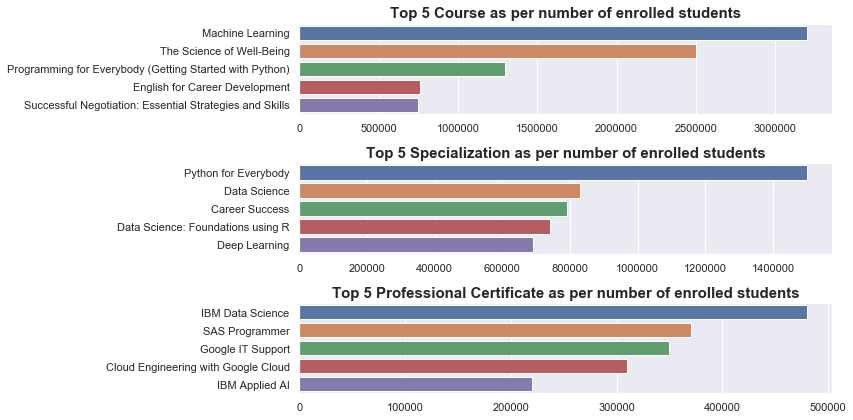

In [30]:
f,a = plt.subplots(3,1,figsize=(12,6))
f.subplots_adjust(wspace = .8)

coursera_df_c = coursera_df[coursera_df['course_Certificate_type'] == 'COURSE']
coursera_df_s = coursera_df[coursera_df['course_Certificate_type'] == 'SPECIALIZATION']
coursera_df_p = coursera_df[coursera_df['course_Certificate_type'] == 'PROFESSIONAL CERTIFICATE']


coursera_df_c = coursera_df_c.sort_values('course_students_enrolled' , ascending=False)
coursera_df_s  = coursera_df_s.sort_values('course_students_enrolled' , ascending=False)
coursera_df_p  = coursera_df_p.sort_values('course_students_enrolled' , ascending=False)

sns.barplot(data = coursera_df_c.head(5), x= 'course_students_enrolled' , y = 'course_title', ax=a[0])
a[0].set_title('Top 5 Course as per number of enrolled students', fontsize=15, fontweight='bold')
a[0].set_xlabel('')
a[0].set_ylabel('')

sns.barplot(data = coursera_df_s.head(5), x= 'course_students_enrolled' , y = 'course_title', ax=a[1])
a[1].set_title('Top 5 Specialization as per number of enrolled students', fontsize=15, fontweight='bold')
a[1].set_xlabel('');
a[1].set_ylabel('');

sns.barplot(data = coursera_df_p.head(5), x= 'course_students_enrolled' , y = 'course_title', ax=a[2])
a[2].set_title('Top 5 Professional Certificate as per number of enrolled students', fontsize=15, fontweight='bold')
a[2].set_xlabel('')
a[2].set_ylabel('');

plt.tight_layout()
plt.savefig('images/image9.png')
plt.show()

21 - Show top 10 Course as per number of enrolled students

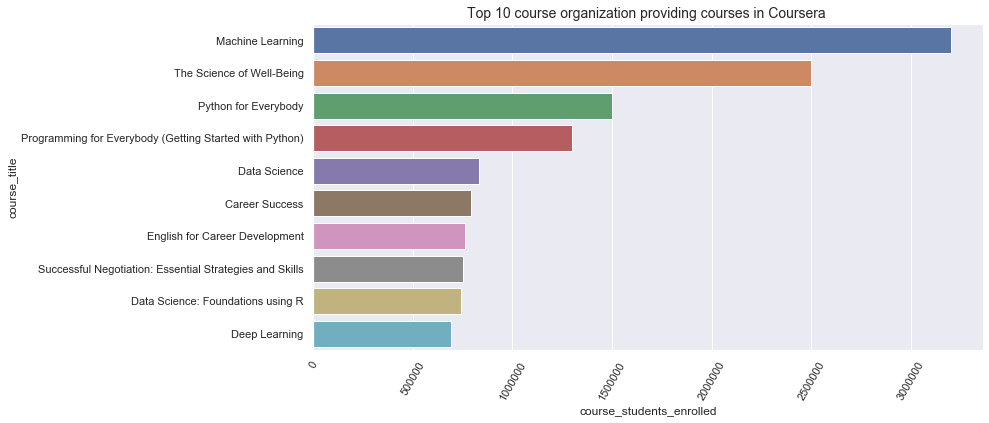

In [31]:
plt.figure(figsize=(12,6))

coursera_df_top_10 = coursera_df.sort_values('course_students_enrolled' , ascending=False).head(10)

sns.barplot(data = coursera_df_top_10, x= 'course_students_enrolled' , y = 'course_title')
plt.xticks(rotation=60)
plt.title("Top 10 course organization providing courses in Coursera ", fontsize = 14)
plt.savefig('images/image10.png')
plt.show()

22 - Define WordCloud graph to show all titles in Coursera Image

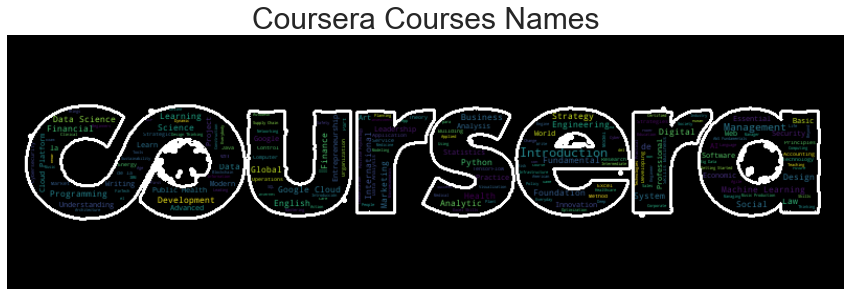

In [32]:
plt.figure(figsize=[15, 15])

image = Image.open("images/coursera_black_background.png")
image_gray = image.convert('L')
image_invert = ImageOps.invert(image_gray)
char_mask = np.array(image_invert)
image_colors = ImageColorGenerator(char_mask)


wordcloud = WordCloud(stopwords=STOPWORDS,
                        background_color='black', 
                        #width=1000,  
                        #height=1000, 
                        max_words=300,
                        mask=char_mask,
                        contour_width=3, 
                        contour_color='white',
                    ).generate(' '.join(coursera_df['course_title']))


plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Coursera Courses Names', fontsize=30)
plt.savefig('images/image11.png')
plt.show()